#  Taylor problem 3.23

last revised: 04-Jan-2020 by Dick Furnstahl [furnstahl.1@osu.edu]


**This notebook is almost ready to go, except that the initial conditions and $\Delta v$ are different from the problem statement and there is no statement to print the figure.  Fix these and you're done!**

This is a conservation of momentum problem, which in the end lets us determine the trajectories of the two masses before and after the explosion.  How should we visualize that the center-of-mass of the pieces continues to follow the original parabolic path?

Plan:
1. Plot the original trajectory, also continued past the explosion time.
2. Plot the two trajectories after the explosion.
3. For some specified times of the latter two trajectories, connect the points and indicate the center of mass.

The implementation here could certainly be improved!  Please make suggestions (and develop improved versions).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

First define some functions we think we will need.  The formulas are based on our paper-and-pencil work.

The trajectory starting from $t=0$ is:

$
\begin{align}
  x(t) &= x_0 + v_{x0} t  \\
  y(t) &= y_0 + v_{y0} t - \frac{1}{2} g t^2
\end{align}
$

In [2]:
def trajectory(x0, y0, vx0, vy0, t_pts, g=9.8):
    """Calculate the x(t) and y(t) trajectories for an array of times,
        which must start with t=0.
    """
    return x0 + vx0*t_pts, y0 + vy0*t_pts - g*t_pts**2/2. 

The velocity at the final time $t_f$ is:

$
\begin{align}
  v_{x}(t) &= v_{x0}  \\
  v_{y}(t) &= v_{y0}  - g t_f
\end{align}
$

In [3]:
def final_velocity(vx0, vy0, t_pts, g=9.8):
    """Calculate the vx(t) and vy(t) at the end of an array of times t_pts"""
    return vx0, vy0 - g*t_pts[-1]  # -1 gives the last element

The center of mass of two particles at $(x_1, y_1)$ and $(x_2, y_2)$ is:

$
\begin{align}
 x_{cm} &= \frac{1}{2}(x_1 + x_2)  \\
 y_{cm} &= \frac{1}{2}(y_1 + y_2)
\end{align}
$

In [4]:
def com_position(x1, y1, x2, y2):  
    """Find the center-of-mass (com) position given two positions (x,y)."""
    return (x1 + x2)/2., (y1 + y2)/2.

**1. Calculate and plot the original trajectory up to the explosion.**

In [51]:
# initial conditions
x0_before, y0_before = [0., 0.]    # put the origin at the starting point
vx0_before, vy0_before = [6., 3.]  # given in the problem statement
g = 1.  # as recommended

# Array of times to calculate the trajectory up to the explosion at t=4
t_pts_before = np.array([5., 6., 7., 8., 9.])
x_before, y_before = trajectory(x0_before, y0_before,
                                vx0_before, vy0_before,
                                t_pts_before, g)

Text(0,0.5,'y')

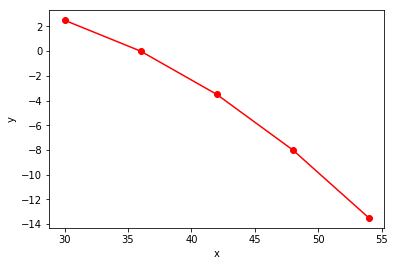

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_before, y_before, 'ro-')

ax.set_xlabel('x')
ax.set_ylabel('y')

Does it make sense so far?  Note that we could use more intermediate points to make a more correct curve (rather than the piecewise straight lines) but this is fine at least for a first pass.

**2. Calculate and plot the two trajectories after the explosion.**

For the second part of the trajectory, we reset our clock to $t=0$ because that is how our trajectory function is constructed.  We'll need initial positions and velocities of the pieces just after the explosion.  These are the final position of the combined piece before the explosion and the final velocity plus and minus $\Delta \mathbf{v}$.  We are told $\Delta \mathbf{v}$.   We have to figure out the final velocity before the explosion.

In [53]:
delta_v = np.array([1., 3.])   # change in velociy of one piece

# reset time to 0 for calculating trajectories
t_pts_after = np.array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
# Also could have used np.arange(0.,6.,1.)

x0_after = x_before[-1]   # -1 here means the last element of the array
y0_after = y_before[-1]
vxcm0_after, vycm0_after = final_velocity(vx0_before, vy0_before,
                                          t_pts_before, g) 
# The _1 and _2 refer to the two pieces after the explosinon
vx0_after_1 = vxcm0_after + delta_v[0]
vy0_after_1 = vycm0_after + delta_v[1]
vx0_after_2 = vxcm0_after - delta_v[0]
vy0_after_2 = vycm0_after - delta_v[1]

# Given the initial conditions after the explosion, we calculate trajectories
x_after_1, y_after_1 = trajectory(x0_after, y0_after,
                                  vx0_after_1, vy0_after_1,
                                  t_pts_after, g)
x_after_2, y_after_2 = trajectory(x0_after, y0_after,
                                  vx0_after_2, vy0_after_2,
                                  t_pts_after, g)
# This is the center-of-mass trajectory
xcm_after, ycm_after = trajectory(x0_after, y0_after,
                                  vxcm0_after, vycm0_after,
                                  t_pts_after, g)

# These are calculated points of the center-of-mass
xcm_pts, ycm_pts = com_position(x_after_1, y_after_1, x_after_2, y_after_2)

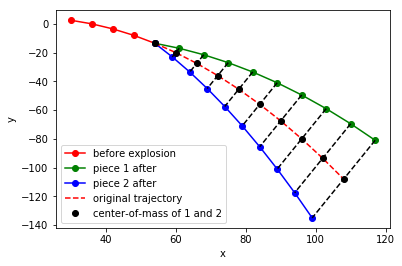

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_before, y_before, 'ro-', label='before explosion')
ax.plot(x_after_1, y_after_1, 'go-', label='piece 1 after')
ax.plot(x_after_2, y_after_2, 'bo-', label='piece 2 after')
ax.plot(xcm_after, ycm_after, 'r--', label='original trajectory')
ax.plot(xcm_pts, ycm_pts, 'o', color='black', label='center-of-mass of 1 and 2')
for i in range(len(t_pts_after)):
    ax.plot([x_after_1[i], x_after_2[i]],
            [y_after_1[i], y_after_2[i]],
            'k--'
           )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();